In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image saved as /media/two-asus/Two2/AIT/DLCV/DLCV-Lab/assignment-1/save/black_white_road.jpg


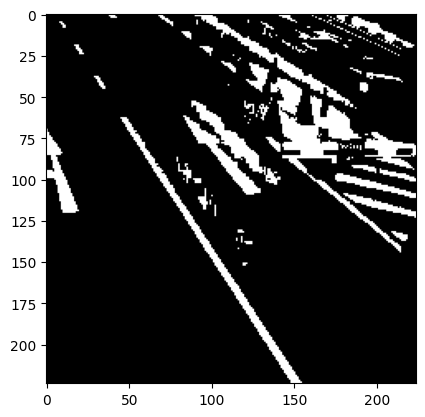

In [3]:
# Load the road_norm_image
road_norm_image = cv2.imread('/media/two-asus/Two2/AIT/DLCV/DLCV-Lab/assignment-1/images/frame_16.jpg')  # Replace 'your_road_norm_image.jpg' with the path to your road_norm_image


road_norm_image = cv2.resize(road_norm_image, (224, 224))

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
road_norm_image = (road_norm_image / 255.0 - mean) / std 

road_norm_image = np.clip(road_norm_image, 0, 1)

car_norm_image_8bit = (road_norm_image * 255).astype(np.uint8)

gray_img = cv2.cvtColor(car_norm_image_8bit, cv2.COLOR_BGR2GRAY)

_, black_white_img_road = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

plt.imshow(black_white_img_road, cmap='gray')

output_path = "/media/two-asus/Two2/AIT/DLCV/DLCV-Lab/assignment-1/save/black_white_road.jpg"

cv2.imwrite(output_path, black_white_img_road)

print(f'Image saved as {output_path}')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


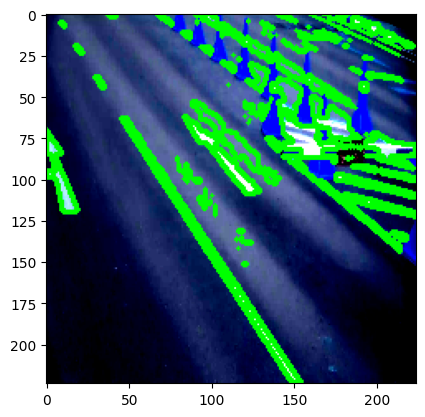

In [4]:
contours, _ = cv2.findContours(black_white_img_road, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = road_norm_image.copy()

cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

plt.imshow(image_with_contours)

In [5]:

file_name = "/media/two-asus/Two2/AIT/DLCV/DLCV-Lab/assignment-1/text/output.txt"

np.savetxt(file_name, black_white_img_road, fmt="%d")

print(f"NumPy array saved to {file_name} successfully.")

NumPy array saved to /media/two-asus/Two2/AIT/DLCV/DLCV-Lab/assignment-1/text/output.txt successfully.


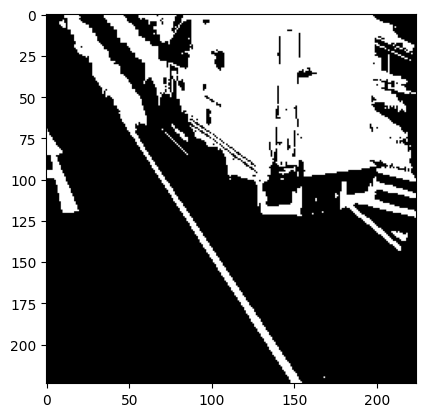

In [6]:

car_norm_img = cv2.imread("/media/two-asus/Two2/AIT/DLCV/DLCV-Lab/assignment-1/dataset/frame_7597.jpg")

car_norm_img = cv2.resize(car_norm_img, (224, 224))

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
car_norm_img = (car_norm_img / 255.0 - mean) / std  


car_norm_img = np.clip(car_norm_img, 0, 1)

car_norm_image_8bit = (car_norm_img * 255).astype(np.uint8)

gray_img = cv2.cvtColor(car_norm_image_8bit, cv2.COLOR_BGR2GRAY)

_, black_white_img_car = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

plt.imshow(black_white_img_car, cmap='gray')

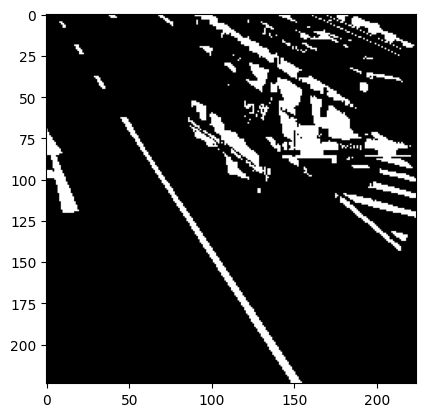

In [7]:
diff_image = cv2.multiply(black_white_img_road, black_white_img_car)
plt.imshow(diff_image, cmap='gray')

Text(0.5, 1.0, 'Bitwise AND')

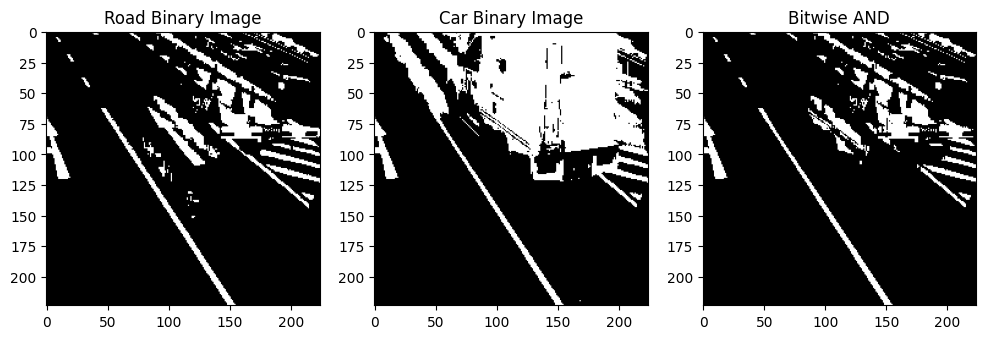

In [8]:
bitwise_and = cv2.bitwise_and(black_white_img_car,black_white_img_road)
bitwise_or = cv2.bitwise_or(black_white_img_car,black_white_img_road)
bitwise_xor = cv2.bitwise_xor(black_white_img_car,black_white_img_road)

# Create subplots to display the images
plt.figure(figsize=(12, 4))

# Original binary images
plt.subplot(131)
plt.imshow(black_white_img_road, cmap='gray')
plt.title('Road Binary Image')

plt.subplot(132)
plt.imshow(black_white_img_car, cmap='gray')
plt.title('Car Binary Image')

# Bitwise AND
plt.subplot(133)
plt.imshow(bitwise_and, cmap='gray')
plt.title('Bitwise AND')